<a href="https://colab.research.google.com/github/jsgf04/TdR_Physics_behind_skiing/blob/main/Per%C3%ADode%20del%20p%C3%A8ndol%20b%C3%A0sic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Períodes del pèndol invertit bàsic**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
L'angle crític a què és vàlid el període és 60.09º
No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


T= 0.542 s per Φ₀= 5º
T= 0.797 s per Φ₀= 10º
T= 1.018 s per Φ₀= 15º
T= 1.229 s per Φ₀= 20º
T= 1.442 s per Φ₀= 25º
T= 1.664 s per Φ₀= 30º
T= 1.901 s per Φ₀= 35º
T= 2.159 s per Φ₀= 40º
T= 2.446 s per Φ₀= 45º
T= 2.769 s per Φ₀= 50º
T= 3.14 s per Φ₀= 55º
T= 3.57 s per Φ₀= 60º
T= 4.075 s per Φ₀= 65º
T= 4.673 s per Φ₀= 70º
T= 5.376 s per Φ₀= 75º
T= 6.174 s per Φ₀= 80º
T= 7.006 s per Φ₀= 85º
T= 7.735 s per Φ₀= 90º


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.


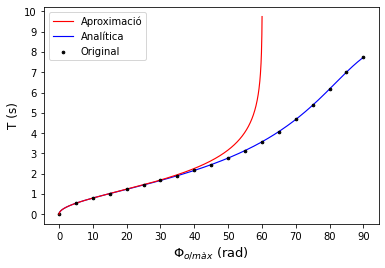

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp, quad
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
zeta = V**2/(g*R_sc)

print("L'angle crític a què és vàlid el període és "+str(round(zeta*180/np.pi, 2))+"º")

if zeta*180/np.pi>90:
  psi_max1 = np.linspace(0, 90, 1000)
else:
  psi_max1 = np.linspace(0, zeta*180/np.pi, 1000)

T_approx = 4*np.sqrt(l/g)*np.log(np.abs(((psi_max1*np.pi/180)-zeta)/(np.sqrt(2*zeta*(psi_max1*np.pi/180)-(psi_max1*np.pi/180)**2)-zeta)))

if V**2/(g*R_sc)<1:
  Phi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Phi_eq = "No hi han posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

if V**2/(g*R_sc)<1:
    Phi_equilibri_arr = round(0.98*Phi_eq,3)
    print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
    print("No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

def solveit(initial_Psi):
  def equations(t,y):
      dy=np.zeros([2])
      dy[0] = y[1]
      dy[1] = (g/l)*np.sin(y[0])-(V**2/(l*R_sc))*np.sign(y[0])

      return dy

  time = np.linspace(0, 10, 100000)

  y0 = [np.radians(initial_Psi), np.radians(0.0)]

  res = solve_ivp(equations, (0,10), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

  t, psi, omega = res.t, res.y[0], res.y[1]

  def find_roots(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

  T_ini_o = find_roots(t.T,psi.T)
  print("T= "+str(round(4*T_ini_o[0], 3))+" s per \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(initial_Psi,2))+"º")
  plt.scatter(initial_Psi, 4*T_ini_o[0], c="k",s=7, zorder=2)

if V**2/(g*R_sc)<=1:
  initial_Psi_list= np.linspace(1, int(180*np.arcsin(zeta)/np.pi),10)
else:
  initial_Psi_list= [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

fig = plt.figure()

for initial_Psi_case in initial_Psi_list:
  solveit(initial_Psi_case)

T_exact = []

if V**2/(g*R_sc)<=1:
  psi_max2 = np.linspace(1, 180*np.arcsin(zeta)/np.pi,1000)
else:
  psi_max2 = np.linspace(0, 90, 1000)

for i in psi_max2:
  def f(x):
     return 1/np.sqrt((np.cos(i*np.pi/180)-np.cos(x))+zeta*(np.abs(i*np.pi/180)-np.abs(x)))
  
  T_exact.append(2*np.sqrt(2)*np.sqrt(l/g)*quad(f, 0, i*np.pi/180)[0])

plt.plot(psi_max1, T_approx,"r",linewidth = 1.15, label="Aproximació", zorder=1)
plt.plot(psi_max2, T_exact,"b",linewidth = 1.15, label="Analítica", zorder=0)
plt.scatter(0, 0, c="k", s=7, label="Original")
plt.legend()
plt.ylim(0,10)
plt.axis("auto")
plt.xlabel(u'${\Phi_{o/màx}}$ (rad)', fontsize=13)
plt.ylabel('T (s)', fontsize=12)

if V**2/(g*R_sc)<=1:
  plt.xticks(np.arange(0, int(180*np.arcsin(zeta)/np.pi)+int(180*np.arcsin(zeta)/np.pi)/10, int(180*np.arcsin(zeta)/np.pi)/10))
else:
  plt.xticks(np.arange(0, 100, 10))

plt.yticks(np.arange(0, 11, 1))
plt.show()